In [32]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

Maybe we should find another way to reduce the amoung of dataframes.

In [59]:
# We load data
cpp_files = glob.glob(path.join("benchmarks", "cpp", "*.csv"))
dfs_cpp = [pd.read_csv(f) for f in cpp_files]
df_cpp = pd.concat(dfs_cpp, ignore_index=True)

cpp_old_files = glob.glob(path.join("benchmarks", "cpp", "v0.1.1", "*.csv"))
dfs_cpp_old = [pd.read_csv(f) for f in cpp_old_files]
df_cpp_old = pd.concat(dfs_cpp_old, ignore_index=True)

df_cpp_base_case = pd.read_csv(path.join("benchmarks", "cpp", "base_case", "20230926-162717-nb=4-th=1073741824-cpp.csv"))

In [63]:
# We drop that one bad data at index 602. 
df_cpp = df_cpp.drop(index=602)

In [65]:
df_cpp.query("threshold == 256")

,buckets,threshold,run,integers,duration [ns]
600,4,256,1,1,76
601,4,256,2,1,65
603,4,256,4,1,69
604,4,256,5,1,66
605,4,256,6,1,65
...,...,...,...,...,...
895,4,256,6,536870912,114204484574
896,4,256,7,536870912,112833732837
897,4,256,8,536870912,113203284256
898,4,256,9,536870912,112748886699


In [66]:
# Format data
df_cpp_mean = df_cpp.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()

df_cpp_old_mean = df_cpp_old.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()

df_cpp_base_case_mean = df_cpp_base_case.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()

Text(0, 0.5, 'runtime [ns]')

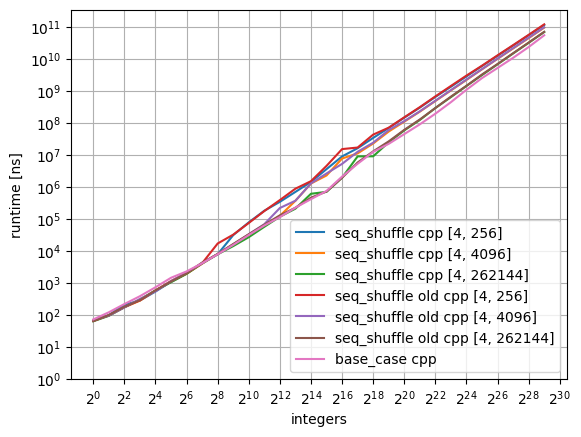

In [70]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [10 ** i for i in range(0, 12, 1)]

# df_cpp_mean[(df_cpp_mean["buckets"] == 4) & (df_cpp_mean["threshold"] == 256)]
# df_cpp_mean.loc[(df_cpp_mean["buckets"] == 4) & (df_cpp_mean["threshold"] == 256)]
ax = df_cpp_mean.query("buckets == 4 & threshold == 256").plot(x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 256]")
df_cpp_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 4096]")
df_cpp_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 262144]")

df_cpp_old_mean.query("buckets == 4 & threshold == 256").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle old cpp [4, 256]")
df_cpp_old_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle old cpp [4, 4096]")
df_cpp_old_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle old cpp [4, 262144]")

df_cpp_base_case_mean.plot(ax=ax, x="integers", y="duration [ns]", label="base_case cpp")

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime [ns]")

As the result above doesn't help us much, let's look into runtime per integer.

In [73]:
# We add a new column
df_cpp_mean["runtime per integer [ns]"] = df_cpp_mean["duration [ns]"] / df_cpp_mean["integers"]

df_cpp_old_mean["runtime per integer [ns]"] = df_cpp_old_mean["duration [ns]"] / df_cpp_old_mean["integers"]

df_cpp_base_case_mean["runtime per integer [ns]"] = df_cpp_base_case_mean["duration [ns]"] / df_cpp_base_case_mean["integers"]

Text(0, 0.5, 'runtime/integer [ns]')

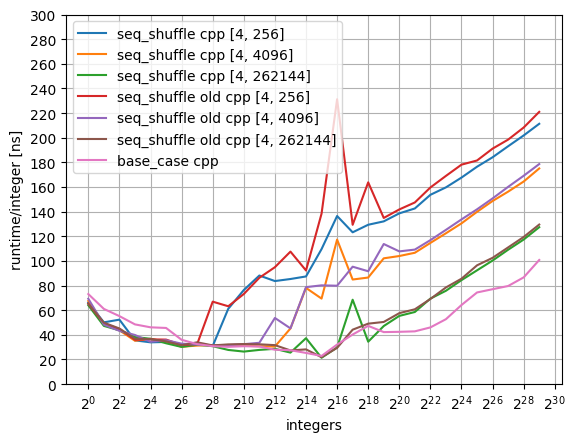

In [75]:
# We plot data
ax_2_xticks = ax_xticks
ax_2_yticks = [10 * i for i in range(0, 31, 2)]

ax_2 = df_cpp_mean.query("buckets == 4 & threshold == 256").plot(x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 256]")
df_cpp_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 4096]")
df_cpp_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 262144]")

df_cpp_old_mean.query("buckets == 4 & threshold == 256").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle old cpp [4, 256]")
df_cpp_old_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle old cpp [4, 4096]")
df_cpp_old_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle old cpp [4, 262144]")

df_cpp_base_case_mean.plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="base_case cpp")

ax_2.set_xscale("log", base=2)
#ax_2.set_yscale("log", base=10)
ax_2.set_xticks(ax_2_xticks)
ax_2.set_yticks(ax_2_yticks)
ax_2.grid(True)
ax_2.set_xlabel("integers")
ax_2.set_ylabel("runtime/integer [ns]")